<a href="https://colab.research.google.com/github/ChelseyCochrane/chelseys-repository/blob/main/Final_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt

import numpy as np 

import pandas as pd

from scipy.stats import pearsonr

import matplotlib

In [2]:
url1 = 'https://raw.githubusercontent.com/ChelseyCochrane/chelseys-repository/main/patch_seq_final_project.csv'
patch_seq = pd.read_csv(url1)
patch_seq

,Project ID,Specimen ID,T type class,T type sub-class,T type,T type assignment probability,MET type,Cortical layer,Genotype,Electrophysiology available,...,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth,Cell set accession ID,T type class assignment probability,T type sub-class assignment probability
0,1HEYEW7GMUKWIQW37BO,888317699,MGE interneuron,Sst interneuron,Sst Tac1 Tacr3,0.40,NaN,5,Calb2-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-t...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100033,1.00,1.00
1,1HEYEW7GMUKWIQW37BO,765853817,MGE interneuron,Pvalb interneuron,Pvalb Reln Itm2a,0.51,NaN,2/3,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100058,1.00,1.00
2,1HEYEW7GMUKWIQW37BO,671876425,CGE interneuron,Lamp5 interneuron,Lamp5 Lsp1,0.59,NaN,2/3,Ndnf-IRES2-dgCre/wt;Ai14(RCL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100006,1.00,1.00
3,1HEYEW7GMUKWIQW37BO,906699622,MGE interneuron,Sst interneuron,Sst Esm1,1.00,NaN,5,Calb2-IRES-Cre/wt;Sst-IRES-FlpO/wt;Ai65(RCFL-t...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100046,1.00,1.00
4,1HEYEW7GMUKWIQW37BO,778301240,MGE interneuron,Pvalb interneuron,Pvalb Gabrg1,1.00,NaN,6a,Sst-IRES-Cre/wt;Th-P2A-FlpO/wt;Ai65(RCFL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100051,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1HEYEW7GMUKWIQW37BO,701163677,CGE interneuron,Lamp5 interneuron,Lamp5 Ntn1 Npy2r,0.51,NaN,2/3,Htr3a-Cre_NO152/wt;Ai14(RCL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100004,0.54,0.54
4280,1HEYEW7GMUKWIQW37BO,671529949,MGE interneuron,Pvalb interneuron,Pvalb Sema3e Kank4,1.00,NaN,6a,Pvalb-IRES-Cre/wt;Ai14(RCL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100055,1.00,1.00
4281,1HEYEW7GMUKWIQW37BO,766764831,CGE interneuron,Lamp5 interneuron,Lamp5 Lhx6,1.00,NaN,6a,Nos1-CreERT2/wt;Ai14(RCL-tdT)/wt,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS180626100007,1.00,1.00
4282,1HEYEW7GMUKWIQW37BO,673132928,MGE interneuron,Sst interneuron,Sst Myh8 Etv1,0.49,Sst-MET-6,6a,Slc32a1-IRES-Cre/wt;Ai14(RCL-tdT)/wt,1,...,0.599466,0.666667,0.0,0.0,0.333333,3.857479,0.777525,CS180626100037,1.00,1.00


In [3]:
tclass = patch_seq.iloc[:,2] 
ISI = patch_seq.iloc[:,14]
PeakV = patch_seq.iloc[:,21]
MGE_ISI = np.array(patch_seq.loc[patch_seq['T type class'] == 'MGE interneuron', ['Avg ISI']].dropna())
MGE_PeakV = np.array(patch_seq.loc[patch_seq['T type class'] == 'MGE interneuron', ['Peak V (long square) (millivolts)']].dropna())
CGE_ISI = np.array(patch_seq.loc[patch_seq['T type class'] == 'CGE interneuron', ['Avg ISI']].dropna())
sclass = patch_seq.iloc[:,3]
FastTrough = patch_seq.iloc[:,15]
latency = patch_seq.iloc[:,19]


Text(0.5, 1.0, 'Inter Spike Intervals')

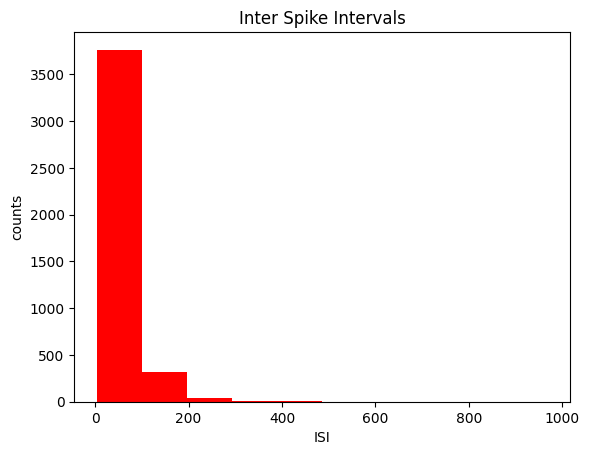

In [4]:
plt.hist(ISI, color = 'red')
plt.xlabel('ISI')
plt.ylabel('counts')
plt.title('Inter Spike Intervals')

Text(0.5, 1.0, 'Peak V (long square) (millivolts)')

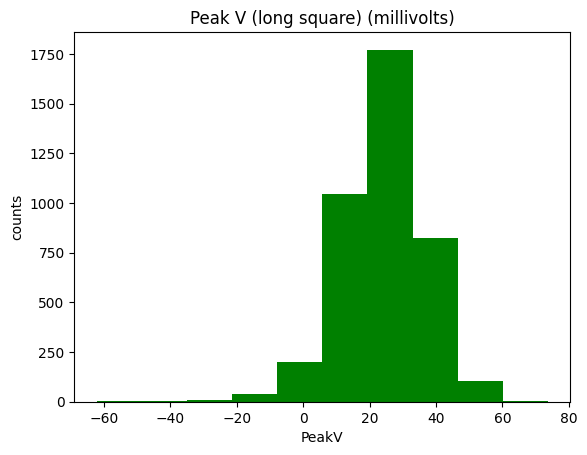

In [5]:
plt.hist(PeakV, color = 'green')
plt.xlabel('PeakV')
plt.ylabel('counts')
plt.title('Peak V (long square) (millivolts)')

<Axes: ylabel='T type class'>

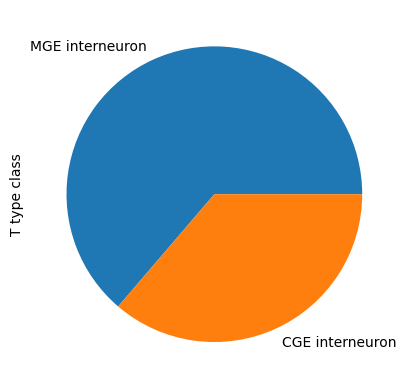

In [6]:
patch_seq['T type class'].value_counts().plot(kind='pie')

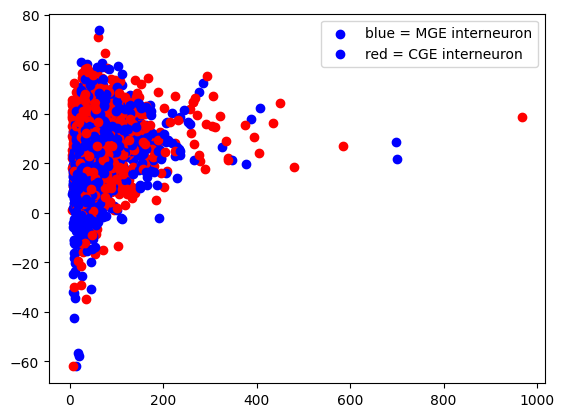

In [7]:
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,2] == 'MGE interneuron':
    plt.scatter(patch_seq.iloc[i,14],patch_seq.iloc[i,21],color = "blue")
  if patch_seq.iloc[i,2] == 'CGE interneuron':
    plt.scatter(patch_seq.iloc[i,14],patch_seq.iloc[i,21],color = "red")

    plt.legend(['blue = MGE interneuron','red = CGE interneuron'])

Text(0.5, 1.0, 'Fast trough V (long square) (millivolts)')

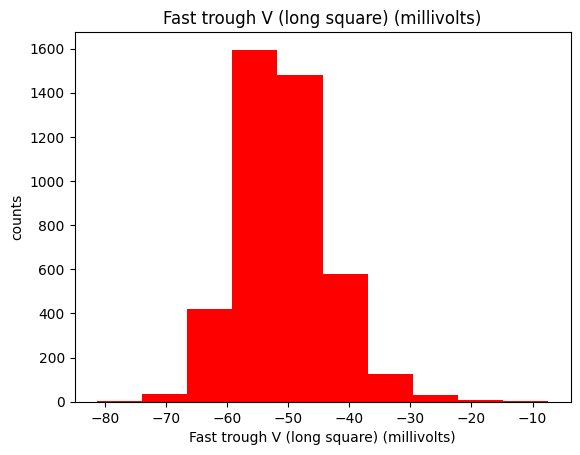

In [8]:
plt.hist(FastTrough, color = 'red')
plt.xlabel('Fast trough V (long square) (millivolts)')
plt.ylabel('counts')
plt.title('Fast trough V (long square) (millivolts)')

Text(0.5, 1.0, 'latency')

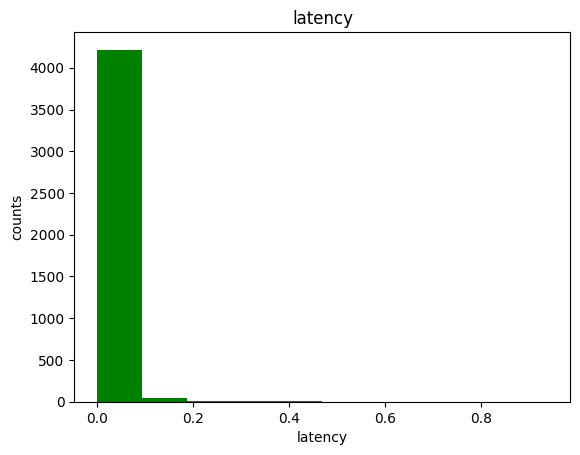

In [9]:
plt.hist(latency, color = 'green')
plt.xlabel('latency')
plt.ylabel('counts')
plt.title('latency')

([<matplotlib.patches.Wedge at 0x7f92e96a9370>,
 [Text(-0.5318832125106359, 0.9628604510776034, 'Sst interneuron'),
  Text(0.5318832125106358, -0.9628604510776034, 'Pvalb interneuron')])

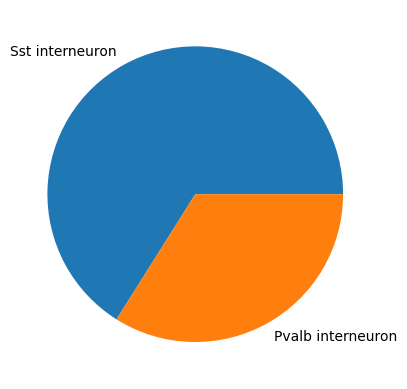

In [10]:
t_plot = patch_seq[(patch_seq['T type sub-class'] == 'Sst interneuron') | (patch_seq['T type sub-class'] == 'Pvalb interneuron')]
plt.pie(t_plot['T type sub-class'].value_counts(), labels = ['Sst interneuron', 'Pvalb interneuron'])

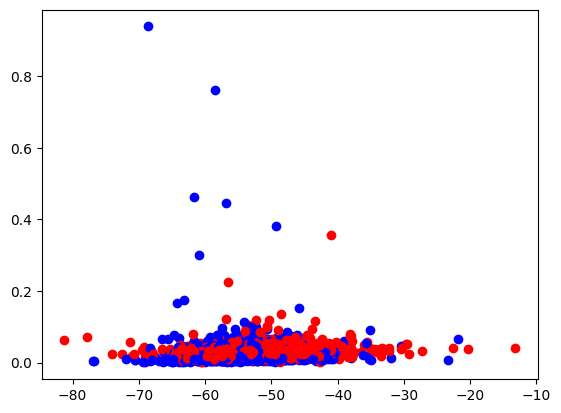

In [11]:
patch_length = len(patch_seq)

for i in range(patch_length):
  if patch_seq.iloc[i,3] == 'Pvalb interneuron':
    plt.scatter(patch_seq.iloc[i,15],patch_seq.iloc[i,19],color = "blue")
  if patch_seq.iloc[i,3] == 'Sst interneuron':
    plt.scatter(patch_seq.iloc[i,15],patch_seq.iloc[i,19],color = "red")

In [12]:
MGE_ISI = patch_seq.loc[patch_seq['T type class'] == 'MGE interneuron', ['Avg ISI']]
MGE_PeakV = patch_seq.loc[patch_seq['T type class'] == 'MGE interneuron', ['Fast trough V (long square) (millivolts)']]
CGE_ISI = patch_seq.loc[patch_seq['T type class'] == 'CGE interneuron', ['Avg ISI']]
CGE_PeakV = patch_seq.loc[patch_seq['T type class'] == 'CGE interneuron', ['Fast trough V (long square) (millivolts)']]